   edibility  capShape_bell  capShape_conical  capShape_convex  capShape_flat  \
0          1              0                 0                0              1   
1          0              0                 0                0              1   
2          0              0                 0                1              0   
3          0              1                 0                0              0   

   capShape_sunken  capColor_brown  capColor_buff  capColor_cinnamon  \
0                0               0              0                  0   
1                0               0              0                  0   
2                0               0              0                  0   
3                0               0              0                  0   

   capColor_gray  ...  stalkColor_cinnamon  stalkColor_gray  stalkColor_pink  \
0              0  ...                    0                0                0   
1              1  ...                    0                0              

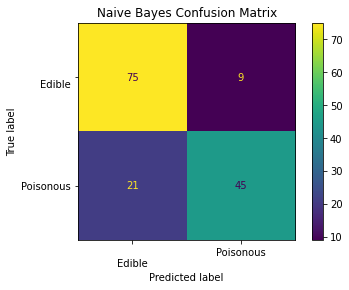

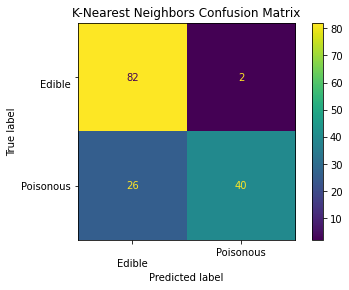

In [79]:
from sklearn.naive_bayes import MultinomialNB;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split;
from IPython.display import Image;
import pydotplus;
from copy import deepcopy;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.metrics import confusion_matrix;
import seaborn as sn;
from sklearn.metrics import plot_confusion_matrix;

# Convert String Columns to Categorical
def categorizeStrings(Table):
    for column in Table.columns:
        if type(Table[column][0]) == str:
            Table[column] = Table[column].astype("category")
            if column == 'edibility':
                Table[column] = Table[column].cat.codes
                continue
            
            Table = Table.join(pd.get_dummies(Table[column], prefix=column))
            Table = Table.drop(column, axis=1)
            
    return Table


# Problem 1

mushroomsOriginal = pd.read_csv("mushrooms.csv")
mushrroms = deepcopy(mushroomsOriginal)
mushrooms = categorizeStrings(mushrooms)
print(mushrooms.head(4))
# targetDrop = list(filter(lambda column: "edibility" in column, mushrooms.columns))

x_train, x_test, y_train, y_test = train_test_split(mushrooms.drop("edibility", axis=1),mushrooms["edibility"], random_state=42, test_size=.30 )
mdl = MultinomialNB()
mdl.fit(x_train, y_train)
errRateNBTrain = 1 - mdl.score(x_train,y_train)
errRateNBTest = 1 - mdl.score(x_test,y_test)

print("Error on training {:.3f}".format(errRateNBTrain))
print("Error on testing {:.3f}\n".format(errRateNBTest))

# Problem 2
# K-nearest Neighbor

training_accuracy = []
testing_accuracy = []


kN = KNeighborsClassifier(n_neighbors=2)
kN.fit(x_train, y_train)
errRateKNNTrain =1 - kN.score(x_train,y_train)
errRateKNNTest = 1 - kN.score(x_test,y_test)
        
print("K-nearest neighbors: 2 neighbors\n")
print("Error on training {:.3f}".format(errRateKNNTrain))
print("Error on testing {:.3f}".format(errRateKNNTest))
    
# Problem 3

# How many mushrooms were missed
y_predNB = mdl.predict(x_test)
y_predKN = kN.predict(x_test)

cm = confusion_matrix(y_test, y_predNB)
missedPoisonNBTest = cm[1][0]

cm = confusion_matrix(y_test, y_predKN)
missedPoisonKNNTest = cm[1][0]

print("\nMissed Poison Mushrooms in Naive Bayes Classifier\n")
print("Testing Set: {} out of {}".format(round(missedPoisonNBTest), len(y_test)))

print("\nMissed Poison Mushrooms in K-nearest neighbors\n")
print("Testing Set: {} out of {}".format(round(missedPoisonKNNTest), len(y_test)))

labels = ["\nEdible", "Poisonous"]
plot_confusion_matrix(mdl, x_test, y_test)
plt.title("Naive Bayes Confusion Matrix")
plt.xticks(ticks = range(2), labels = labels)
plt.yticks(ticks = range(2), labels = labels)
plt.show()

labels = ["\nEdible", "Poisonous"]
plot_confusion_matrix(kN, x_test, y_test)
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xticks(ticks = range(2), labels = labels)
plt.yticks(ticks = range(2), labels = labels)
plt.show()

In [29]:
mushrooms.to_csv('encodedMushrooms.csv')